# 2023년 서울의 월별 대기질 농도 변화 분석 및 예측

## 주제
"2023년 서울의 월별 대기질 농도 변화는 예측 가능한가?"

---

## 분석 목표 및 질문

1. **2024년 대기질 농도를 예측할 수 있는가?**
   - 주요 지표인 초미세먼지(PM2.5)를 기준으로 월별 평균 농도 데이터를 활용하여 미래 변화를 예측.
   - Prophet 모델 등 시계열 분석 기법을 통해 2024년 PM2.5 농도의 감소 추세를 평가.

2. **과거 데이터에서 이상치를 탐지할 수 있는가?**
   - 대기질 농도가 비정상적으로 높거나 낮은 날을 탐지.
   - 탐지된 이상치가 특정 월 또는 계절에 집중되었는지 분석하여 원인 파악.

3. **계절성, 추세, 노이즈의 분리는 어떤 정보를 제공하는가?**
   - 시계열 데이터를 분해하여 계절적 패턴과 연간 추세를 분석.
   - 계절성과 추세를 통해 대기질 변화의 주요 요인과 구조적인 패턴을 시각적으로 확인.

---

## 분석 과정

1. **데이터 준비 및 전처리**:
   - 2023년 서울 지역 대기질 데이터를 병합 및 정제.
   - 주요 대기질 지표(PM2.5, PM10, NO2)를 기준으로 월별 평균 데이터를 생성하여 분석 가능하도록 준비.

2. **시각화**:
   - 월별 대기질 변화(선 그래프)를 통해 주요 지표의 추세와 패턴 확인.
   - PM2.5, PM10, NO2 간의 비교를 통해 각 지표 간 차이 및 변동성 평가.

3. **시계열 분석**:
   - 계절성, 추세, 노이즈를 분해하여 주요 변동 요인을 분석.
   - 이상치 탐지로 특정 시점에서 농도 급증의 원인을 파악.

4. **모델링 및 예측**:
   - Prophet 모델을 활용해 2024년 월별 PM2.5 농도를 예측.
   - 예측 결과를 시각화하여 미래 대기질 변화에 대한 통찰 제공.

---

## 결과 및 기대 성과

1. **패턴 분석**:
   - 계절적 요인(겨울철 고농도, 여름철 저농도)과 연간 추세를 파악하여 대기질 변화의 주요 구조를 확인.

2. **이상치 탐지**:
   - 특정 시기에 발생한 고농도일의 원인 분석을 통해 대기질 관리에 활용.

3. **미래 예측**:
   - 2024년 대기질 농도가 감소할 가능성을 기반으로 정책 및 환경적 조치를 설계하는 데 기여.

In [1]:
#필요 라이브러리 호출
import pandas as pd #데이터프레임을 다루기 위한 라이브러리
import os #파일 및 디렉토리 작업을 위한 라이브러리
import matplotlib.pyplot as plt #그래프 생성 및 시각화를 위한 라이브러리
from matplotlib import rc 
from matplotlib import font_manager #rc 및 font_manager: 한글 폰트 설정
from prophet import Prophet #시계열 데이터 예측을 위한 라이브러리


# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # Windows 환경에서 한글 폰트를 정상적으로 표시
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지 

c:\Users\???\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 데이터 파일이 저장된 폴더 경로
folder_path = r"C:\Users\???\Desktop\BigData\2023"

# 폴더 안의 모든 .xlsx 파일 목록을 가져옴
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# 데이터를 저장할 빈 리스트 초기화
data_frames = []

# 각 파일을 순회하면서 데이터 읽기
for file in file_paths:
    try:
        # 파일 읽기
        df = pd.read_excel(file)
        data_frames.append(df)  # 읽은 데이터프레임을 리스트에 추가
        print(f"성공적으로 읽음: {file}")  # 파일 읽기 성공 메시지 출력
    except Exception as e:
        print(f"파일 읽기 오류 발생 {file}: {e}")  # 오류 발생 시 메시지 출력

# 모든 데이터프레임을 하나로 병합
all_data = pd.concat(data_frames, ignore_index=True)

# 병합된 데이터를 바로 분석에 활용
print(f"병합된 데이터 크기: {all_data.shape}")


성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 10월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 11월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 12월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 1월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 2월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 3월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 4월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 5월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 6월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 7월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 8월.xlsx
성공적으로 읽음: C:\Users\???\Desktop\BigData\2023\2023년 9월.xlsx
병합된 데이터 크기: (5667289, 12)


In [3]:
# 데이터 구조 확인
print("데이터프레임의 기본 정보:")
print(all_data.info())  # 데이터 기본 정보 출력

print("\n데이터프레임의 첫 5개 행:")
print(all_data.head())  

print("\n데이터프레임의 열 이름:")
print(all_data.columns)

데이터프레임의 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667289 entries, 0 to 5667288
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역      object 
 1   망       object 
 2   측정소코드   int64  
 3   측정소명    object 
 4   측정일시    int64  
 5   SO2     float64
 6   CO      float64
 7   O3      float64
 8   NO2     float64
 9   PM10    float64
 10  PM25    float64
 11  주소      object 
dtypes: float64(6), int64(2), object(4)
memory usage: 518.9+ MB
None

데이터프레임의 첫 5개 행:
      지역     망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  PM10  \
0  서울 중구  도시대기  111121   중구  2023100101  0.0024  0.36  0.0386  0.0105  35.0   
1  서울 중구  도시대기  111121   중구  2023100102  0.0026  0.37  0.0327  0.0122  37.0   
2  서울 중구  도시대기  111121   중구  2023100103  0.0027  0.39  0.0322  0.0111  37.0   
3  서울 중구  도시대기  111121   중구  2023100104  0.0030  0.35  0.0365  0.0084  33.0   
4  서울 중구  도시대기  111121   중구  2023100105  0.0027  0.35  0.0361  0.0083  31.0   

   PM25          

## 분석에 필요한 열

### 1. 지역
- **이유**:
  - 서울 지역 데이터를 필터링하기 위해 필요
  - 대기질 데이터를 지역별로 분류하고 분석하는 데 핵심적인 역할

### 2. 측정일시
- **이유**:
  - 시계열 분석을 위해 필수적인 열
  - 날짜와 시간 정보를 기반으로 월별 평균 데이터를 계산하거나 계절적 패턴을 분석 가능

### 3. PM10 (미세먼지)
- **이유**:
  - PM10은 중요한 대기질 지표 중 하나로, 건강에 미치는 영향이 크기 때문에 분석에 포함
  - PM2.5와 함께 비교하거나 월별 변화 추이를 확인 가능

### 4. PM25 (초미세먼지)
- **이유**:
  - 분석의 주된 초점인 초미세먼지 농도를 나타내는 지표
  - 월별 평균값과 이상치를 탐지하고 시계열 예측 모델에 사용

### 5. NO2 (이산화질소)
- **이유**:
  - 대기 오염의 주요 원인 중 하나인 질소 산화물의 농도를 나타냄
  - PM2.5와의 상관관계를 분석하거나 계절별 패턴을 파악할 때 유용


In [4]:
# 필요한 열만 선택
cln_data = all_data[["측정일시", "지역", "PM25", "PM10", "NO2"]]
print("\n필요한 열만 선택 후 데이터 크기:")
print(cln_data.shape)

# "서울"이 포함된 데이터만 필터링
seoul = cln_data[cln_data["지역"].str.contains("서울", na=False)]
print("\n서울 지역 데이터 크기:")
print(seoul.shape)


필요한 열만 선택 후 데이터 크기:
(5667289, 5)

서울 지역 데이터 크기:
(350400, 5)


### **"측정일시" 데이터 수정이 필요한 이유**

#### 현재 데이터 내 "측정일시"는 2023010101(23년 1월 1일 01시)의 형식으로 나타남.

#### 1. **일관성**
- "측정일시" 데이터는 정확한 날짜와 시간 정보를 제공해야 하기 때문에.
- 데이터 형식이 불완전하거나 손상되면 날짜 기반 분석이 불가능.

#### 2. **시계열 분석 요구사항**
- 월별, 계절별 분석 또는 예측 모델링(Prophet, ARIMA 등)을 수행하려면 `datetime` 형식이 필수.
- `datetime`으로 변환하지 않으면 날짜 그룹화, 이동 평균 계산 등 시계열 처리가 어려움.

#### 3. **결측 및 오류 데이터 제거**
- 잘못된 형식(`NaT`) 또는 길이가 맞지 않는 데이터는 정확한 분석을 방해.
- 데이터의 신뢰성을 높이기 위해 이러한 데이터를 제거.

#### 4. **가독성 및 효율성**
- 날짜 형식 데이터를 `datetime`으로 변환하면 분석, 시각화, 모델링 과정이 훨씬 간단해지고 직관적.

### -> 정확한 데이터 확인을 위해 모든 데이터프레임 체크 및 서울 지역 데이터프레임도 다시 한 번 체크.

In [5]:
# 1. 측정일시 데이터 점검
print("\n[측정일시 데이터 원본 샘플]")
print(all_data["측정일시"].head(10)) #all_data 데이터프레임의 측정일시 열의 상위 10개 데이터를 출력
"""
원본 데이터를 점검하여 데이터가 올바른 형식(예: YYYYMMDDHH)인지 확인
"""

# 2. 잘못된 측정일시 데이터 제거
all_data["측정일시"] = all_data["측정일시"].astype(str)
all_data = all_data[all_data["측정일시"].str.len() == 10]

# 3. datetime 변환
all_data["측정일시"] = pd.to_datetime(all_data["측정일시"], format="%Y%m%d%H", errors="coerce")

# 변환 실패 데이터 확인
failed_conversion = all_data[all_data["측정일시"].isnull()]
print("\n[datetime 변환 실패 데이터]")
print(failed_conversion)

# 4. 변환 성공 데이터 필터링
all_data = all_data[all_data["측정일시"].notnull()]
print("\n[유효 데이터 크기]")
print(all_data.shape)

# 5. 서울 지역 데이터 필터링
seoul = all_data[all_data["지역"].str.contains("서울", na=False)]
print("\n[서울 지역 데이터 크기]")
print(seoul.shape)



[측정일시 데이터 원본 샘플]
0    2023100101
1    2023100102
2    2023100103
3    2023100104
4    2023100105
5    2023100106
6    2023100107
7    2023100108
8    2023100109
9    2023100110
Name: 측정일시, dtype: int64

[datetime 변환 실패 데이터]
             지역       망   측정소코드 측정소명 측정일시     SO2    CO      O3     NO2  PM10  \
23        서울 중구    도시대기  111121   중구  NaT  0.0027  0.28  0.0393  0.0074  11.0   
47        서울 중구    도시대기  111121   중구  NaT  0.0025  0.52  0.0099  0.0346  20.0   
71        서울 중구    도시대기  111121   중구  NaT  0.0024  0.52  0.0088  0.0309  18.0   
95        서울 중구    도시대기  111121   중구  NaT  0.0028  0.34  0.0425  0.0061  13.0   
119       서울 중구    도시대기  111121   중구  NaT  0.0028  0.35  0.0229  0.0159  15.0   
...         ...     ...     ...  ...  ...     ...   ...     ...     ...   ...   
5667192  인천 옹진군  국가배경농도  831495   울도  NaT  0.0013  0.39  0.0139  0.0210   NaN   
5667216  인천 옹진군  국가배경농도  831495   울도  NaT  0.0012  0.28  0.0440  0.0028   8.0   
5667240  인천 옹진군  국가배경농도  831495   울도  NaT  0.0

In [6]:
# 월별 평균값 계산
monthly_avg = seoul.groupby(seoul["측정일시"].dt.to_period("M"))[["PM25", "PM10", "NO2"]].mean()
# dt.to_period("M")를 사용해 월 단위로 그룹화. 각 지표(PM25, PM10, NO2)의 월별 평균을 계산.

# 결과 확인
print("\n[월별 평균값]")
print(monthly_avg)

# 인덱스를 datetime 형식으로 변환 (시각화를 위해)
monthly_avg.index = monthly_avg.index.to_timestamp()



[월별 평균값]
              PM25       PM10       NO2
측정일시                                   
2023-01  26.138330  48.749718  0.031689
2023-02  30.597190  47.570846  0.032152
2023-03  30.836541  69.497800  0.030529
2023-04  21.434249  63.864723  0.021885
2023-05  18.249760  40.007544  0.020694
2023-06  17.019302  29.586358  0.018351
2023-07  16.767018  27.347671  0.017241
2023-08  13.477359  22.158371  0.016027
2023-09  11.592595  21.389322  0.017011
2023-10  15.345701  29.178421  0.023655
2023-11  17.007544  31.596329  0.023855
2023-12  21.497539  37.108505  0.029831


### 주요 패턴
- PM2.5와 PM10은 겨울과 봄에 높은 농도를 보이며, 여름에 낮아지는 계절적 패턴을 보임.
- NO2는 상대적으로 일정한 수준을 유지하며, 큰 변동은 없음.

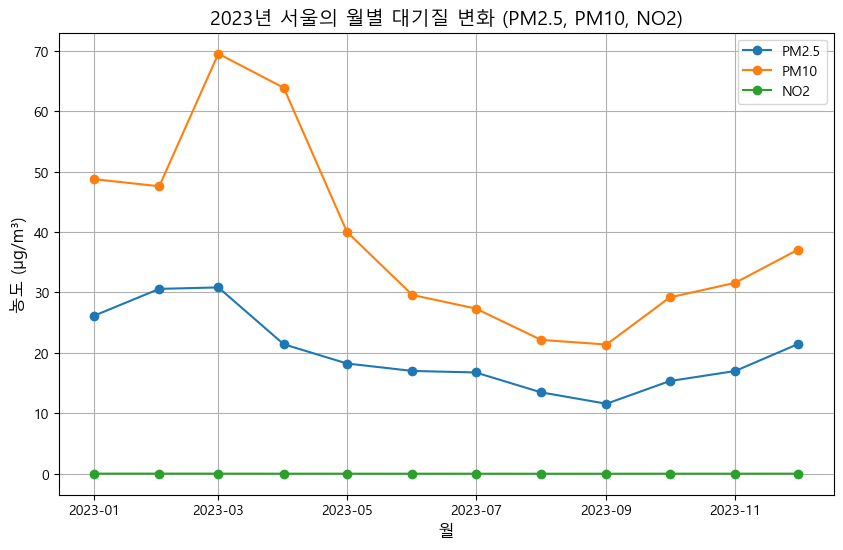

In [7]:
# 월별 대기질 변화 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg["PM25"], marker="o", label="PM2.5")
plt.plot(monthly_avg.index, monthly_avg["PM10"], marker="o", label="PM10")
plt.plot(monthly_avg.index, monthly_avg["NO2"], marker="o", label="NO2")
plt.title("2023년 서울의 월별 대기질 변화 (PM2.5, PM10, NO2)", fontsize=14)
plt.xlabel("월", fontsize=12)
plt.ylabel("농도 (µg/m³)", fontsize=12)
plt.grid()
plt.legend()
plt.show()


- PM2.5(초미세먼지)와 PM10(미세먼지)는 계절적 요인에 따라 변동성이 큼.
  - 겨울(1~3월)과 봄(4월)에 높은 값을 보임.
  - 여름(6~9월)에는 농도가 가장 낮음.
  - 가을(10월 이후)에 다시 증가하는 패턴.
- NO2(이산화질소)는 변동성이 낮으며 연중 일정한 수준을 유지함.
- 난방, 교통량 변화, 기상 조건 등이 주요 원인으로 추정됨.

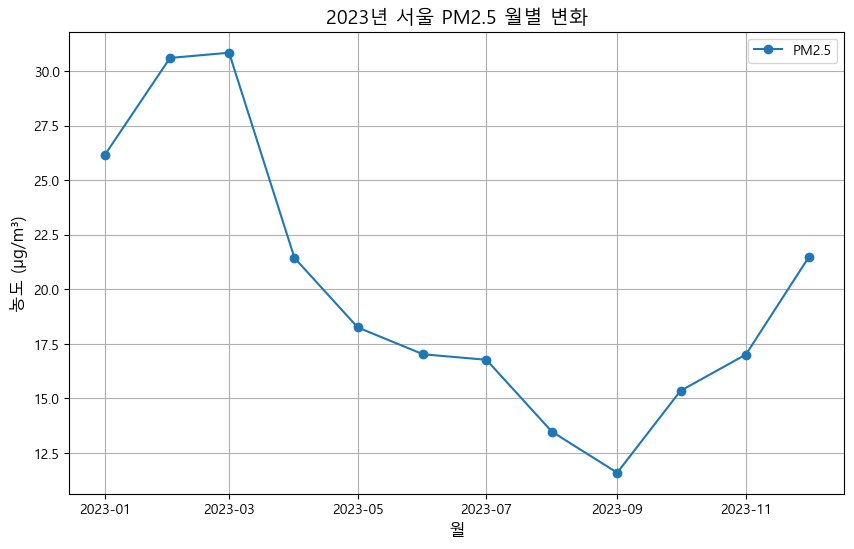

In [8]:
# PM2.5 월별 변화 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg["PM25"], marker="o", label="PM2.5")
plt.title("2023년 서울 PM2.5 월별 변화", fontsize=14) 
plt.xlabel("월", fontsize=12)
plt.ylabel("농도 (µg/m³)", fontsize=12)
plt.legend()
plt.grid()
plt.show()


- PM2.5 농도는1월(26.13 µg/m³)에서 3월(30.83 µg/m³)까지 증가한 뒤 여름(8월, 13.47 µg/m³)으로 갈수록 감소.
- 가을(10월, 15.35 µg/m³)부터 다시 증가하며, 겨울(12월, 21.50 µg/m³)에 도달.
- 계절에 따른 뚜렷한 변동성이 확인되며, 겨울철 난방 및 봄철 황사가 주요 요인으로 작용했을 가능성이 높음.


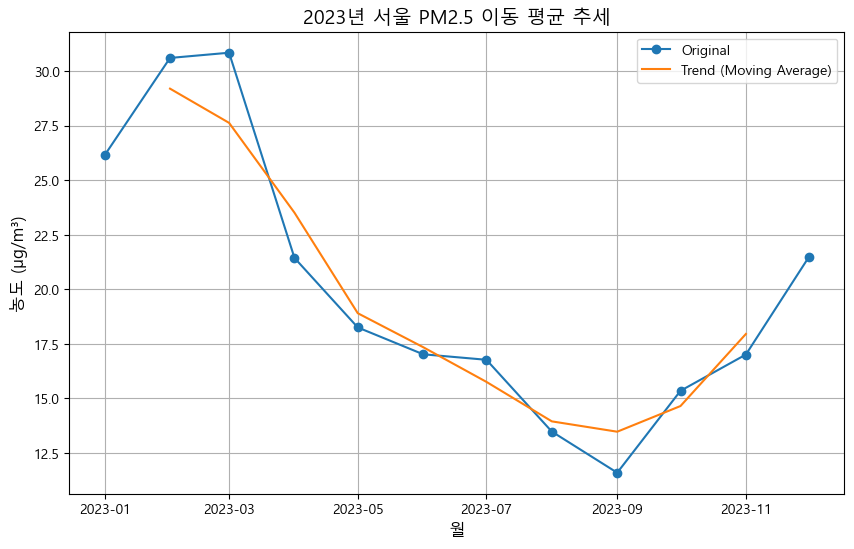

In [9]:
# 이동 평균 계산
monthly_avg["PM25_trend"] = monthly_avg["PM25"].rolling(window=3, center=True).mean()

# PM2.5 이동 평균 추세 시각화
monthly_avg["PM25_trend"] = monthly_avg["PM25"].rolling(window=3, center=True).mean() 
#이동 평균 계산 및 이동 평균 추세에서 사용된 rolling(window=3): 이동 평균 계산 (3개월)

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg["PM25"], marker="o", label="Original")
plt.plot(monthly_avg.index, monthly_avg["PM25_trend"], label="Trend (Moving Average)")
plt.title("2023년 서울 PM2.5 이동 평균 추세", fontsize=14) 
plt.xlabel("월", fontsize=12)
plt.ylabel("농도 (µg/m³)", fontsize=12)
plt.legend()
plt.grid()
plt.show()


- 이동 평균 추세:
  - 봄(3월) 최고점(30.83 µg/m³) 이후 지속적으로 감소.
  - 여름(8월)에 최저점을 기록한 후 가을부터 다시 상승.
- 계절성의 영향을 부드럽게 반영하며, 연중 PM2.5 농도의 변화 방향을 명확히 보여줌.
- 여름철 PM2.5 감소는 강수량 증가와 대기 순환 강화가 주요 원인일 가능성이 큼.


17:13:35 - cmdstanpy - INFO - Chain [1] start processing
17:13:35 - cmdstanpy - INFO - Chain [1] done processing


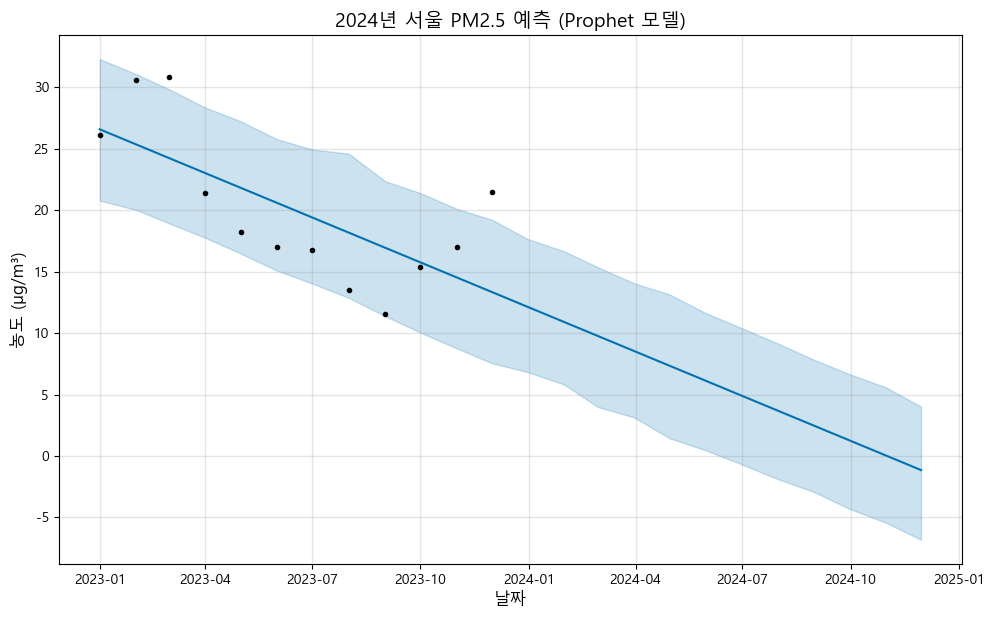

In [10]:
# Prophet용 데이터 준비
prophet_data = monthly_avg.reset_index()[["측정일시", "PM25"]]
prophet_data.columns = ["ds", "y"]  # Prophet 요구사항에 맞게 ds(날짜), y(값)으로 열 이름 변경.

# Prophet 모델 생성 및 학습
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# 미래 예측 데이터 생성: 12개월 미래 데이터를 생성하고 예측.
future = prophet_model.make_future_dataframe(periods=12, freq="M")
forecast = prophet_model.predict(future)

# Prophet 시각화
fig = prophet_model.plot(forecast)
plt.title("2024년 서울 PM2.5 예측 (Prophet 모델)", fontsize=14)
plt.xlabel("날짜", fontsize=12)
plt.ylabel("농도 (µg/m³)", fontsize=12)
plt.show()

- Prophet 모델을 사용해 2024년 PM2.5 농도를 예측:
  - **전체적인 감소 추세**를 보이며, 2024년 말에는 약 **10 µg/m³ 이하**로 예상.
  - 예측 결과는 2023년 데이터를 기반으로 했으며, 신뢰 구간(파란 음영)을 통해 불확실성도 시각화함.
- 정책 변화, 날씨 등 외부 요인이 반영되지 않았으므로 추가적 해석이 필요.

# 결론

## 계절성 패턴
- **PM2.5**와 **PM10**:
  - 계절적 요인(난방, 기상 변화 등)으로 인해 농도가 변화.
  - 겨울과 봄에 높은 농도를 보이는 반면, 여름에는 상대적으로 낮은 수준.
- **NO2**:
  - 상대적으로 일정한 패턴을 유지하며, 계절 변화의 영향을 적게 받음.

---

## 2024년 예측
- **PM2.5**:
  - 전반적으로 감소 추세를 보이며, 2024년 말에는 약 **10 µg/m³ 이하**로 예상.
  - 이는 2023년 데이터를 기반으로 한 예측으로, 추가적인 환경 요인을 고려해야 함.

---

## 추가 분석 가능성
1. **이상치 탐지**:
   - 특정 시기의 PM2.5와 PM10 급증 원인 분석 가능.
   - 계절적 패턴 외의 요인(예: 대기오염 사건, 황사 등)을 탐지.
2. **상관관계 분석**:
   - PM2.5와 NO2 또는 PM10 간의 연관성을 평가.
   - 대기질 지표 간 상호작용을 이해하고 주요 요인 분석 가능.

---

## 정책적 시사점

### 1. **계절별 맞춤형 대기질 관리 정책 필요**
- **겨울 및 봄철 고농도 관리**:
  - PM2.5와 PM10 농도가 겨울과 봄에 급증하는 경향을 보입니다. 이는 난방 연료 사용 증가 및 봄철 황사가 주요 원인일 가능성이 큽.
  - **대책**:
    - 겨울철 난방 에너지 효율 개선 및 친환경 연료 사용 확대.
    - 봄철 황사 대비 사전 대기질 예보 강화 및 시민 보호 캠페인 시행.

- **여름철 대기질 관리 유지**:
  - 여름철 농도가 낮아지는 것은 강수량 증가와 대기 순환 강화의 효과로 보입니다.
  - **대책**:
    - 여름철 차량 통행량 감축 정책의 지속적인 추진으로 낮은 농도를 유지.

---

### 2. **교통 및 산업 배출 저감 정책 강화**
- **NO2 농도의 일정한 수준 유지**:
  - NO2는 교통 및 산업 배출의 주요 지표로, 계절적 변동성이 낮으나 지속적인 관리가 필요.
  - **대책**:
    - 대중교통 이용 활성화를 통한 차량 배출가스 감소.
    - 산업체 배출 허용 기준 강화 및 실시간 배출 모니터링 도입.

---

### 3. **이상치 분석을 통한 대기질 개선 기회 포착**
- 특정 시점에서 PM2.5와 PM10 농도의 급증은 비정상적인 대기 오염 사건을 나타낼 가능성이 있음.
- **대책**:
  - 이상치 발생 시 실시간 데이터 모니터링을 통한 원인 파악.
  - 신속 대응 체계 구축으로 대기질 악화 방지.

---

### 4. **장기적 대기질 개선 목표 수립**
- 2024년 PM2.5 농도가 감소 추세를 보일 것으로 예측되었으나, 외부 변수(예: 기상 조건, 정책 변화)에 따라 변동 가능.
- **대책**:
  - 장기적 목표: PM2.5 농도를 WHO 권고 기준 이하로 유지.
  - 지속적인 데이터 분석과 정책 피드백을 통한 관리 전략 개선.

---

### 5. **시민 참여와 인식 제고**
- 대기질 개선은 정책만으로는 한계가 있으므로 시민들의 자발적인 참여가 필수적.
- **대책**:
  - 대기질 개선 캠페인 확대.
  - 대기 오염 경감 활동(예: 차량 2부제, 공기 정화 식물 보급) 참여 유도.
